In [0]:
#import tensorflow as tf

In [0]:
from numba.typed import List
from numba import jit, njit, vectorize
from concurrent.futures import ThreadPoolExecutor

In [0]:
#from tensorflow.keras import Sequential
#from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
#from tensorflow.keras.layers import Conv2D, MaxPool2D
#from tensorflow.keras.optimizers import Adam

In [0]:
#print(tf.__version__)

In [5]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(processes=False)
client = Client(cluster)
client

/usr/local/lib/python3.6/dist-packages/distributed/bokeh/core.py:57: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 99] Cannot assign requested address
  warnings.warn('\n' + msg)
/usr/local/lib/python3.6/dist-packages/distributed/deploy/local.py:197: UserWarning: 
Could not launch service 'bokeh' on port 8787. Got the following message:

[Errno 99] Cannot assign requested address
  self.scheduler.start(scheduler_address)


Client Scheduler: inproc://172.28.0.2/939/1,Cluster Workers: 1 Cores: 2 Memory: 13.65 GB


In [0]:
import dask
import dask.dataframe as dd

In [8]:
#Loading the Drive helper and mount
from google.colab import drive
#HERE Will prompt for authorisation
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
source = r"/content/drive/My Drive/bbdc2019/Subjects"
subfolders = os.listdir(source)
print(subfolders)

['Subject01', 'Subject02', 'Subject03', 'Subject04', 'Subject05', 'Subject06', 'Subject07', 'Subject08', 'Subject09', 'Subject10', 'Subject11', 'Subject12', 'Subject13', 'Subject14', 'Subject15', 'Subject16', 'Subject17', 'Subject18', 'Subject19']


In [10]:
source

'/content/drive/My Drive/bbdc2019/Subjects'

In [0]:
nofolders = len(subfolders)  

In [12]:
print(nofolders)

19


In [0]:
def list_files(dir):
    r = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            r.append(os.path.join(root, name))
    return r

In [0]:
all_csv = list_files(source)

In [0]:
#all_csv = np.array(all_csv)

In [0]:
#all_csv

In [17]:
len(all_csv)

8139

In [0]:
col_sub='EMG1,EMG2,EMG3,EMG4,Airborne,ACC_upper_X,ACC_upper_Y,ACC_upper_Z,Goniometer_X,ACC_lower_X,ACC_lower_Y,ACC_loewr_Z,Goniometer_Y,Gyro_upper_X,Gyro_upper_Y,Gyro_upper_Z,Gyro_lower_X,Gyro_lower_Y,Gyro_lower_Z'

In [0]:
targets=['run','walk', 'stand','sit','sit-to-stand','stand-to-sit','stair-up',
 'stair-down','jump-one-leg','jump-two-leg','curve-left-step',
 'curve-right-step','curve-left-spin-Lfirst','curve-left-spin-Rfirst',
 'curve-right-spin-Lfirst', 'curve-right-spin-Rfirst',
 'lateral-shuffle-right','lateral-shuffle-left','v-cut-left-Lfirst',
 'v-cut-left-Rfirst','v-cut-right-Lfirst','v-cut-right-Rfirst']

In [0]:
targets = np.array(targets)

In [0]:
trainData=r"/content/drive/My Drive/bbdc2019/train.csv"
testData=r"/content/drive/My Drive/bbdc2019/challenge.csv"

In [0]:
train = pd.read_csv(trainData, nrows=50)
test = pd.read_csv(testData, nrows = 50)

In [23]:
train.head()

,Subject,Datafile,Label
0,Subject02,Subject02/Subject02_Aufnahme000.csv,curve-left-step
1,Subject02,Subject02/Subject02_Aufnahme001.csv,curve-left-step
2,Subject02,Subject02/Subject02_Aufnahme002.csv,stand-to-sit
3,Subject02,Subject02/Subject02_Aufnahme003.csv,curve-right-spin-Rfirst
4,Subject02,Subject02/Subject02_Aufnahme004.csv,jump-one-leg


In [0]:
#train.insert(loc=2, column='PCA1', value=['' for i in range(train.shape[0])])
#train.insert(loc=3, column='PCA2', value=['' for i in range(train.shape[0])])
#train.insert(loc=4, column='PCA3', value=['' for i in range(train.shape[0])])

In [25]:
train.head()

,Subject,Datafile,Label
0,Subject02,Subject02/Subject02_Aufnahme000.csv,curve-left-step
1,Subject02,Subject02/Subject02_Aufnahme001.csv,curve-left-step
2,Subject02,Subject02/Subject02_Aufnahme002.csv,stand-to-sit
3,Subject02,Subject02/Subject02_Aufnahme003.csv,curve-right-spin-Rfirst
4,Subject02,Subject02/Subject02_Aufnahme004.csv,jump-one-leg


In [26]:
train.Label[0]

'curve-left-step'

In [27]:
test.head()

,Subject,Datafile,Label
0,Subject01,Subject01/Subject01_Aufnahme000.csv,X
1,Subject01,Subject01/Subject01_Aufnahme001.csv,X
2,Subject01,Subject01/Subject01_Aufnahme002.csv,X
3,Subject01,Subject01/Subject01_Aufnahme003.csv,X
4,Subject01,Subject01/Subject01_Aufnahme004.csv,X


In [0]:
#train['Datafile'] = train['Datafile'].str.replace('/','\\')
#test['Datafile'] = test['Datafile'].str.replace('/','\\')

In [0]:
#show the complete path of our traing csv
train_cs = source+'/'+train['Datafile']
test_cs = source+'/'+test['Datafile']

In [30]:
train_cs

0     /content/drive/My Drive/bbdc2019/Subjects/Subj...
1     /content/drive/My Drive/bbdc2019/Subjects/Subj...
2     /content/drive/My Drive/bbdc2019/Subjects/Subj...
3     /content/drive/My Drive/bbdc2019/Subjects/Subj...
4     /content/drive/My Drive/bbdc2019/Subjects/Subj...
5     /content/drive/My Drive/bbdc2019/Subjects/Subj...
6     /content/drive/My Drive/bbdc2019/Subjects/Subj...
7     /content/drive/My Drive/bbdc2019/Subjects/Subj...
8     /content/drive/My Drive/bbdc2019/Subjects/Subj...
9     /content/drive/My Drive/bbdc2019/Subjects/Subj...
10    /content/drive/My Drive/bbdc2019/Subjects/Subj...
11    /content/drive/My Drive/bbdc2019/Subjects/Subj...
12    /content/drive/My Drive/bbdc2019/Subjects/Subj...
13    /content/drive/My Drive/bbdc2019/Subjects/Subj...
14    /content/drive/My Drive/bbdc2019/Subjects/Subj...
15    /content/drive/My Drive/bbdc2019/Subjects/Subj...
16    /content/drive/My Drive/bbdc2019/Subjects/Subj...
17    /content/drive/My Drive/bbdc2019/Subjects/

In [31]:
test_cs

0     /content/drive/My Drive/bbdc2019/Subjects/Subj...
1     /content/drive/My Drive/bbdc2019/Subjects/Subj...
2     /content/drive/My Drive/bbdc2019/Subjects/Subj...
3     /content/drive/My Drive/bbdc2019/Subjects/Subj...
4     /content/drive/My Drive/bbdc2019/Subjects/Subj...
5     /content/drive/My Drive/bbdc2019/Subjects/Subj...
6     /content/drive/My Drive/bbdc2019/Subjects/Subj...
7     /content/drive/My Drive/bbdc2019/Subjects/Subj...
8     /content/drive/My Drive/bbdc2019/Subjects/Subj...
9     /content/drive/My Drive/bbdc2019/Subjects/Subj...
10    /content/drive/My Drive/bbdc2019/Subjects/Subj...
11    /content/drive/My Drive/bbdc2019/Subjects/Subj...
12    /content/drive/My Drive/bbdc2019/Subjects/Subj...
13    /content/drive/My Drive/bbdc2019/Subjects/Subj...
14    /content/drive/My Drive/bbdc2019/Subjects/Subj...
15    /content/drive/My Drive/bbdc2019/Subjects/Subj...
16    /content/drive/My Drive/bbdc2019/Subjects/Subj...
17    /content/drive/My Drive/bbdc2019/Subjects/

In [0]:
df = train_cs
dfs = test_cs

In [33]:
df

0     /content/drive/My Drive/bbdc2019/Subjects/Subj...
1     /content/drive/My Drive/bbdc2019/Subjects/Subj...
2     /content/drive/My Drive/bbdc2019/Subjects/Subj...
3     /content/drive/My Drive/bbdc2019/Subjects/Subj...
4     /content/drive/My Drive/bbdc2019/Subjects/Subj...
5     /content/drive/My Drive/bbdc2019/Subjects/Subj...
6     /content/drive/My Drive/bbdc2019/Subjects/Subj...
7     /content/drive/My Drive/bbdc2019/Subjects/Subj...
8     /content/drive/My Drive/bbdc2019/Subjects/Subj...
9     /content/drive/My Drive/bbdc2019/Subjects/Subj...
10    /content/drive/My Drive/bbdc2019/Subjects/Subj...
11    /content/drive/My Drive/bbdc2019/Subjects/Subj...
12    /content/drive/My Drive/bbdc2019/Subjects/Subj...
13    /content/drive/My Drive/bbdc2019/Subjects/Subj...
14    /content/drive/My Drive/bbdc2019/Subjects/Subj...
15    /content/drive/My Drive/bbdc2019/Subjects/Subj...
16    /content/drive/My Drive/bbdc2019/Subjects/Subj...
17    /content/drive/My Drive/bbdc2019/Subjects/

In [34]:
dfs

0     /content/drive/My Drive/bbdc2019/Subjects/Subj...
1     /content/drive/My Drive/bbdc2019/Subjects/Subj...
2     /content/drive/My Drive/bbdc2019/Subjects/Subj...
3     /content/drive/My Drive/bbdc2019/Subjects/Subj...
4     /content/drive/My Drive/bbdc2019/Subjects/Subj...
5     /content/drive/My Drive/bbdc2019/Subjects/Subj...
6     /content/drive/My Drive/bbdc2019/Subjects/Subj...
7     /content/drive/My Drive/bbdc2019/Subjects/Subj...
8     /content/drive/My Drive/bbdc2019/Subjects/Subj...
9     /content/drive/My Drive/bbdc2019/Subjects/Subj...
10    /content/drive/My Drive/bbdc2019/Subjects/Subj...
11    /content/drive/My Drive/bbdc2019/Subjects/Subj...
12    /content/drive/My Drive/bbdc2019/Subjects/Subj...
13    /content/drive/My Drive/bbdc2019/Subjects/Subj...
14    /content/drive/My Drive/bbdc2019/Subjects/Subj...
15    /content/drive/My Drive/bbdc2019/Subjects/Subj...
16    /content/drive/My Drive/bbdc2019/Subjects/Subj...
17    /content/drive/My Drive/bbdc2019/Subjects/

In [35]:
%%time

import os
import shutil
import csv
import sys

for cs in df:
  x = str(cs)
  #shutil.copy(x, r"/content/drive/My Drive/bbdc2019/train", follow_symlinks=True)
  #file.copy(x, r"D:\projec\bd2019\train", recursive = TRUE,overwrite = TRUE, copy.mode = TRUE, copy.date = FALSE)
  #file.copy(from = r"cs", to = r"D:\projec\bd2019\train\", recursive = TRUE)

CPU times: user 103 µs, sys: 0 ns, total: 103 µs
Wall time: 108 µs


In [36]:
%%time
import os
import shutil
import csv
import sys
for c in dfs:
  x = str(c)
  #shutil.copy(x, r"/content/drive/My Drive/bbdc2019/test", follow_symlinks=True)

CPU times: user 68 µs, sys: 0 ns, total: 68 µs
Wall time: 71 µs


In [37]:
%%time
train_df = dd.read_csv(r"/content/drive/My Drive/bbdc2019/train/*.csv",header = None).partitions[0:50]

CPU times: user 13.1 s, sys: 4.31 s, total: 17.4 s
Wall time: 38.2 s


In [38]:
%%time
train_df

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
npartitions=50,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [39]:
%%time
test_df = dd.read_csv(r"/content/drive/My Drive/bbdc2019/train/*.csv",header = None).partitions[0:50]

CPU times: user 11 s, sys: 3.74 s, total: 14.8 s
Wall time: 25.6 s


In [40]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,32688,32224,32991,32609,32790,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
1,32744,32571,32935,32279,32863,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
2,32788,32934,32767,32624,32899,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
3,32828,33202,32587,32377,32783,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736
4,32870,33269,32423,32954,32719,33048,37168,34610,27374,29068,29264,28408,31784,28133,29295,29244,33216,37140,34736


In [41]:
%%time
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df)

CPU times: user 4.56 s, sys: 43.7 ms, total: 4.6 s
Wall time: 4.02 s


In [42]:
%%time
from sklearn.decomposition import PCA

CPU times: user 28.9 ms, sys: 2.68 ms, total: 31.6 ms
Wall time: 32.1 ms


In [43]:
%%time
# Project the data onto the 2 primary principal components
pca = PCA(n_components=3, random_state = 42)
pca.fit(X_scaled)

CPU times: user 419 ms, sys: 235 ms, total: 654 ms
Wall time: 345 ms


In [0]:
X_pca = pca.transform(X_scaled)

In [45]:
Xpca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2','PCA3'])
Xpca_df

,PCA1,PCA2,PCA3
0,-0.011848,0.314590,0.308046
1,-0.009845,0.308187,0.304326
2,-0.010435,0.316770,0.307237
3,-0.007774,0.312601,0.302873
4,-0.009502,0.325739,0.307968
...,...,...,...
137955,0.223845,-0.795930,1.259106
137956,0.225369,-0.793449,1.259056
137957,0.221930,-0.790249,1.265358
137958,0.219051,-0.789848,1.270690


In [46]:
X_scaled.shape, X_pca.shape

((137960, 19), (137960, 3))

In [0]:
Xpca_df.insert(loc=3, column='targets', value=['' for i in range(Xpca_df.shape[0])])

In [48]:
len(train_df.partitions[0]),len(train_df.partitions[1]),len(train_df.partitions[2]),len(train_df.partitions[2])

(6159, 5569, 2589, 2589)

In [50]:
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
npartitions=50,,,,,,,,,,,,,,,,,,,
,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [51]:
train.Label[0],train.Label[1],train.Label[2]

('curve-left-step', 'curve-left-step', 'stand-to-sit')

In [0]:
tar = []
for i in range(0, 50):
  for j in range(0,len(train_df.partitions[i])):
    tar.append(train.Label[i])


In [53]:
len(tar)

137960

In [54]:
tar[1000],tar[9000],tar[13000],tar[17000]

('curve-left-step', 'curve-left-step', 'stand-to-sit', 'jump-one-leg')

In [0]:
Xpca_df['targets'] = tar

Text(0, 0.5, 'Second Prrincipal Component Analysis')

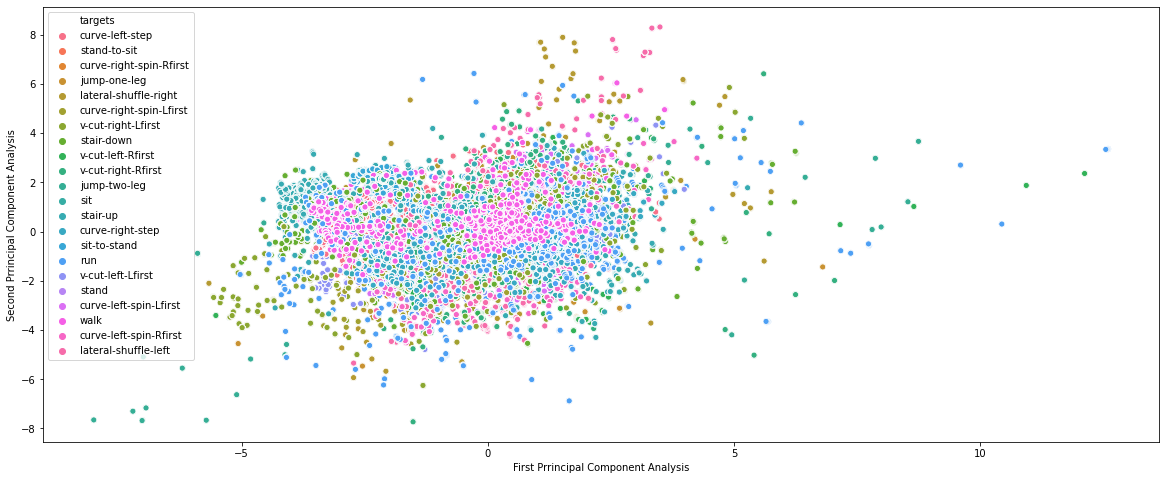

In [56]:
import itertools
plt.figure(figsize=(20,8))

#plt.scatter(X_pca[:,0],X_pca[:,1], c=colors , cmap = 'viridis')
ax = sns.scatterplot(X_pca[:,0],X_pca[:,1], hue="targets",
                     data=Xpca_df)
plt.xlabel('First Prrincipal Component Analysis')
plt.ylabel('Second Prrincipal Component Analysis')

In [57]:

pca.explained_variance_ratio_

array([0.13270814, 0.10155647, 0.09292853])

<BarContainer object of 3 artists>

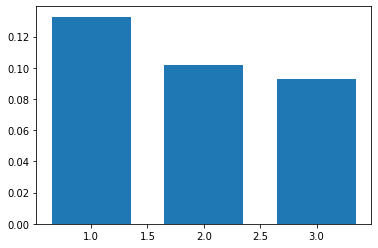

In [58]:
pca = PCA(n_components=3, random_state=42)
X_pca = pca.fit_transform(X_scaled)
variance = pca.explained_variance_ratio_

plt.bar(x = range(1, len(variance)+1),height=variance, width = 0.7)

In [59]:
variance

array([0.13270814, 0.10155647, 0.09292853])

In [0]:
import numpy as np
import plotly.express as px

In [61]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.13270814, 0.10155647, 0.09292853])

In [0]:
explained_variance = np.insert(explained_variance, 0, 0)

In [0]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

In [0]:
pc_df = pd.DataFrame(['','PC1', 'PC2','PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [65]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.132708,0.133
2,PC2,0.101556,0.235
3,PC3,0.092929,0.328


In [66]:
fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [67]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

In [68]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ), row=1, col=1
    )

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue"),
    ), row=1, col=2
    )

fig.show()

In [0]:
import plotly.express as px

In [0]:

#fig = px.scatter_3d(Xpca_df, x='PC1', y='PC2', z='targets',color =None)
#fig.show()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

In [72]:
Xpca_df

,PCA1,PCA2,PCA3,targets
0,-0.011848,0.314590,0.308046,curve-left-step
1,-0.009845,0.308187,0.304326,curve-left-step
2,-0.010435,0.316770,0.307237,curve-left-step
3,-0.007774,0.312601,0.302873,curve-left-step
4,-0.009502,0.325739,0.307968,curve-left-step
...,...,...,...,...
137955,0.223845,-0.795930,1.259106,walk
137956,0.225369,-0.793449,1.259056,walk
137957,0.221930,-0.790249,1.265358,walk
137958,0.219051,-0.789848,1.270690,walk


In [75]:
X = Xpca_df.drop('targets', axis = 1)
y = Xpca_df['targets']

X.shape, y.shape

((137960, 3), (137960,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify = y)

In [0]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Accuracy on test set: ')
    print(accuracy_score(y_test, y_pred))

In [79]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy on test set: 
0.9891272832705132
CPU times: user 37.9 s, sys: 350 ms, total: 38.2 s
Wall time: 19.6 s


Training and Testing

In [84]:
for comp in range(1,4):
    pca = PCA(n_components=comp, random_state=42)
    pca.fit(X_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    print('Selected Components: ', comp)
    run_randomForest(X_train_pca, X_test_pca, y_train, y_test)
    print()

Selected Components:  1
Accuracy on test set: 
0.2029936213395187

Selected Components:  2
Accuracy on test set: 
0.8823572049869527

Selected Components:  3
Accuracy on test set: 
0.9893447376051029

